# Ayudantía: Conceptos Básicos ML

En esta ayudantía trabajaremos en los conceptos básicos de machine learning y recorreremos el flujo común que requiere un trabajo de este tipo: **preprocesamiento, entrenamiento/predicción y análisis de resultados**. Para esto la idea es que vayamos soltando la mano con algunas librerías claves, como pandas, numpy, sklearn, etc.

### Visualización de los datos de países

Primero vamos a cargar los `DataFrame` con datos relevantes sobre paises, en particular los nombres, la población, el pib, nivel de alfabetización, entre otros datos que nos van a ayudar a determinar el nivel de mortalidad infantil de cada país. 

Los siguientes tres bloques exportan codigos.csv (codigos de comuna), población.csv (cuanta gente vive en la comuna) y presupuesto.csv (el presupuesto comunal). Evitamos descrbir más los datasets, pero puedes llamar a una descripción usando dataframe.info()

In [1]:
import pandas as pd

df_codigos = pd.read_csv("Codigo Paises.csv", delimiter=',')
df_codigos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cod_pais     227 non-null    int64 
 1   nombre_pais  227 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [2]:
df_poblacion = pd.read_csv("Poblacion.csv", delimiter=',')
df_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CODIGO     227 non-null    int64
 1   POBLACION  227 non-null    int64
dtypes: int64(2)
memory usage: 3.7 KB


In [3]:
df_otros = pd.read_csv("PIB-ABC-TEL.csv", delimiter=',')
df_otros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COD_PAIS        227 non-null    int64  
 1   PIB             226 non-null    object 
 2   ALFABETIZACION  209 non-null    float64
 3   TELEFONOS       223 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.2+ KB


### Limpieza

Fijate que el ítem PIB es de tipo object, y no int. Por qué será esto? 

In [4]:
# Nos hacemos cargo de los datos nulos
df_otros = df_otros.dropna()


# Casteamos el 'PIB'.
df_otros['PIB'] = df_otros['PIB'].map(lambda x: x.replace("'", ""))
# ERROR: tenemos valores nulos
df_otros['PIB'] = df_otros['PIB'].astype(int)

df_otros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 226
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COD_PAIS        206 non-null    int64  
 1   PIB             206 non-null    int32  
 2   ALFABETIZACION  206 non-null    float64
 3   TELEFONOS       206 non-null    float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 7.2 KB


### Joins

Las siguientes líneas nos van a servir para hacer `merge` entre los _datasets_. El objetivo es hacer solo un join, se debe escribir lo que falta para tener un solo dataframe que tenga una fila por país, con todos los datos. **IMPORTANTE** Muchas veces, cuando apliquemos técnicas de estadística o machine learning, vamos a buscar esta forma, en donde todas las entidades son un vector. 

**Consejo**: una vez que hagas los joins, te aconsejamos quedarte solo con ['Nombre', 'POBLACIÓN', 'PIB', 'ALFABETIZACION', 'TELEFONOS']. 



In [5]:
df_extended = df_codigos.merge(df_poblacion, left_on='cod_pais', right_on='CODIGO')
df_extended = df_extended.merge(df_otros, left_on='cod_pais', right_on='COD_PAIS')

df_extended = df_extended[['cod_pais', 'nombre_pais', 'POBLACION', 'PIB', 'ALFABETIZACION', 'TELEFONOS']]
df_extended.head()

,cod_pais,nombre_pais,POBLACION,PIB,ALFABETIZACION,TELEFONOS
0,0,Afghanistan,31056997,700,36.0,3.2
1,1,Albania,3581655,4500,86.5,71.2
2,2,Algeria,32930091,6000,70.0,78.1
3,3,American Samoa,57794,8000,97.0,259.5
4,4,Andorra,71201,19000,100.0,497.2


In [6]:
df_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cod_pais        206 non-null    int64  
 1   nombre_pais     206 non-null    object 
 2   POBLACION       206 non-null    int64  
 3   PIB             206 non-null    int32  
 4   ALFABETIZACION  206 non-null    float64
 5   TELEFONOS       206 non-null    float64
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 10.5+ KB


Y ahora vamos a hacer un gráfico interactivo donde se vea el PIB en función del nivel de alfabetización. ¿Qué se podría esperar?

Text(0, 0.5, 'Alfabetización (%)')

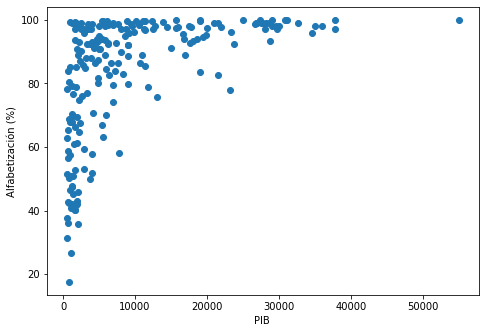

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(df_extended['PIB'], df_extended['ALFABETIZACION'])
ax.set_xlabel('PIB ')
ax.set_ylabel('Alfabetización (%)')


¿Cál es el outlier?

In [8]:
outlier = df_extended[df_extended['PIB'] == df_extended['PIB'].max()]
outlier

,cod_pais,nombre_pais,POBLACION,PIB,ALFABETIZACION,TELEFONOS
110,121,Luxembourg,474413,55100,100.0,515.4


## Entrenamiento/Predicción

Queremos predecir el nivel de mortalidad infantil a partir del nivel de alfabetización del país.

In [9]:
# Cargamos dataset de mortalidad infantil y lo agregamos a nuestro dataframe.
df_mortalidad = pd.read_csv("Mortalidad Infantil.csv", delimiter=',')
df_extended = df_extended.merge(df_mortalidad, left_on='cod_pais', right_on='CODIGO').dropna()
df_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 205
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_pais             204 non-null    int64  
 1   nombre_pais          204 non-null    object 
 2   POBLACION            204 non-null    int64  
 3   PIB                  204 non-null    int32  
 4   ALFABETIZACION       204 non-null    float64
 5   TELEFONOS            204 non-null    float64
 6   CODIGO               204 non-null    int64  
 7   MORTALIDAD INFANTIL  204 non-null    float64
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 13.5+ KB


In [43]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Creamos regresión de grado 9.
poly_features = PolynomialFeatures(degree=9, include_bias=False)
regr = make_pipeline(poly_features, linear_model.LinearRegression())

# Separamos nuestros datos en set de train y test (y el de validación(?))
X_train, X_test, y_train, y_test = train_test_split(df_extended[['ALFABETIZACION']], df_extended['MORTALIDAD INFANTIL'], test_size=0.15, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(173, 1)
(31, 1)


### Recordatorio métricas

$$\text{MSE} = \frac{1}{n} \sum_{1 \leq i \leq n} (y_i - \beta^T\bar x^i)^2$$

El coeficiente r^2 corresponde a la suma de los errores, dividido por la diferencia entre cada punto y su media. 

$$r^2 = 1 - \frac{\sum_{1 \leq i \leq n} (y_i - \beta^T\bar x^i)^2}{\sum_{1 \leq i \leq n} (y_i - \bar y)^2},$$

donde $$\bar y = \frac{\sum_{1 \leq i \leq n} y_i}{n}$$

¿Nos sirven para datos categóricos?

In [44]:
# Entrenemos..
regr.fit(X_train, y_train)

# Veamos como nos fue..
regr_pred = regr.predict(X_train)
# Calculamos el r^2
print('1) r2 score (train): %f'
      % r2_score(y_train, regr_pred))

# Ahora como nos fue con el set de test...
regr_pred = regr.predict(X_test)
print('2) r2 socre (test): %f'
      % r2_score(y_test, regr_pred))

# Son lógicos estos resultados?

1) r2 score (train): 0.622478
2) r2 socre (test): 0.356844


In [45]:
# Veamos como nos va con cross_validation
from sklearn.model_selection import cross_val_score

# Hacemos cross_validation para 4 sets de validación distintos.
# El set de validación es 'parte del set de train'.
r2 = cross_val_score(regr, X_train, y_train, scoring='r2', cv=5)

print(f'Resultados para cada iteración: \n{r2}')
print()

print(f'Resultados generales: \n{r2.mean()}')
print()

Resultados para cada iteración: 
[0.58600579 0.62019103 0.57941119 0.53622148 0.61883219]

Resultados generales: 
0.5881323355970192



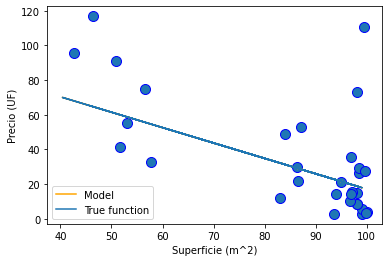

In [68]:
import numpy as np
from sklearn.pipeline import Pipeline

poly_features = PolynomialFeatures(degree=1, include_bias=False)
simple_regr = make_pipeline(poly_features, linear_model.LinearRegression())

X_train = X_train.iloc[:20,:]
y_train = y_train.iloc[:20]
simple_regr.fit(X_train, y_train)

polynomial_features = PolynomialFeatures(degree=1, include_bias=False)
regression = linear_model.LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", regression)])
pipeline.fit(X_train, y_train)
#scores = cross_val_score(pipeline, X, Y, scoring="neg_mean_squared_error", cv=10)

plt.plot(X_train, pipeline.predict(X_train), color='orange', label="Model")
plt.plot(X_train, simple_regr.predict(X_train), label="True function")
plt.scatter(X_test, y_test, edgecolor='b', s=100)
plt.xlabel("Superficie (m^2)")
plt.ylabel("Precio (UF)")
plt.legend(loc="best")
plt.show()

Ahora entrena un predictor que según la cantidad de telefonos de un país nos entregue el nivel de mortalidad infantil.